# Regressão Logística por gradiente descendente
O presente código implementa um algoritmo para obtenção dos coeficientes para uma regressão logistica, utilizando o método de gradiente descendente para ajustar os coeficientes que melhor se ajustem a um conjunto de dados fornecidos.

O foco do algoritmo é encontrar os coeficientes em z que minimizem a função de custo logarítmica (função de perda).
## Dados
Os dados utilizados para esse algoritmo foram dados tratados disponibilizados no repositório em outro projeto do autor
https://github.com/neocrz/heart_disease/tree/main/data
Provenientes primariamente do repositório da UC Irvine Machine Learning Repository
https://archive.ics.uci.edu/dataset/45/heart+disease sob a licensa CC BY 4.0

## Operação
### Função de Custo (Log Loss)
A Função escolhida foi a log-verossimilhança negativa (Log Loss) após a observação de ganho na acurácia no modelo após sua utilização.

Ela é dada por:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right]$$

Onde:

- $m$ é o número total de elementos de treino.
- $x^{(i)}$ é o vetor de características em $i$.
- $y^{(i)}$ é o rótulo da classe (0 ou 1) em $i$.
- $h_{\theta}(x)$ é a função de ativação da regressão logística, ou seja, a **sigmoide**.

### Função de Ativação (Sigmoide)
A sigmoide é a função que transforma a combinação linear dos coeficientes em uma probabilidade entre 0 e 1.
$$h_{\theta}(x) = \sigma(z) = \frac{1}{1 + e^{-z}}$$

Onde:
- $z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$ é a combinação linear dos coeficientes $\theta$ e as variáveis de entrada $x$.

### Gradiente da função de custo
A derivada da função de custo em relação ao parâmetro $\theta_j$ é dada por:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$

Basicamente, é realizado a medição do erro entre a previsão $h_{\theta}(x)$ e o valor real $y$, e então multiplicando pelo valor da variável de entrada correspondente $x_j^{(i)}$.

### Atualização dos Coeficientes
O algoritmo atualiza os coeficientes $\theta_j$ através da seguinte fórmula:

$$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$$

Onde:

- $\alpha$ é a taxa de aprendizado (learning rate).
- $\frac{\partial J(\theta)}{\partial \theta_j}$ é o gradiente calculado para $\theta_j$.
### Critério de Parada
O gradiente descendente vai continuar a atualização dos coeficientes até que o valor da função de custo converja ou o número de iterações atinja um limite (adicionado devido ao tempo elevado de execução). 

Se a diferença entre os valores sucessivos da função de custo for menor que a tolerância, o processo de otimização é interrompido.

$| J(\theta^{(t+1)}) - J(\theta^{(t)}) | < \text{tolerância}$

Onde $J(\theta^{(t)})$ é o valor da função de custo na iteração $t$.

## Implementação

In [1]:
import math
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# sigmoid
def sigmoid(z):
    """
    função sigmoide: 1 / (1 + exp(-z))
    
    parâmetros:
    z : float ou array-like
        A entrada da função sigmoide (combinação linear dos coeficientes e variáveis).
    
    retorna:
    float ou array-like
        O valor da sigmoide.
    """
    return 1 / (1 + math.exp(-z))


In [3]:
def compute_cost(X, y, theta):
    """
    custo para o modelo de regressão logística
    
    Parâmetros:
    X : DataFrame
        A matriz de características (m x n).
    y : Series ou array
        O vetor de rótulos reais (m x 1 | uma variável resposta apenas).
    theta : array
        O vetor de coeficientes (n x 1).
    
    Retorna:
    float
        O valor do custo J(θ) para os coeficientes θ.
    """
    m = len(y)  # número de entradas
    total_cost = 0
    
    for i in range(m):
        z = sum(theta[j] * X.iloc[i, j] for j in range(len(theta)))  # Z - combinação linear entre theta e X
        h = sigmoid(z)  # sigmoide 
        
        # custo
        total_cost += -y.iloc[i] * math.log(h) - (1 - y.iloc[i]) * math.log(1 - h)
    
    return total_cost / m


In [4]:
def compute_gradient(X, y, theta):
    """
    Calcula o gradiente da função de custo (derivada parcial).
    
    Parâmetros:
    X : DataFrame
        A matriz de características (m x n).
    y : Series ou array
        O vetor de rótulos reais (m x 1).
    theta : array
        O vetor de coeficientes (n x 1).
    
    Retorna:
    array
        O vetor de gradientes para cada coeficiente (n x 1).
    """
    m = len(y)  # número de exemplos
    gradients = [0] * len(theta)
    
    for j in range(len(theta)):
        gradient_sum = 0
        for i in range(m):
            z = sum(theta[k] * X.iloc[i, k] for k in range(len(theta)))  # combinação linear
            h = sigmoid(z)  # sigmoide
            gradient_sum += (h - y.iloc[i]) * X.iloc[i, j]
        
        gradients[j] = gradient_sum / m
    
    return gradients


In [5]:
def gradient_descent(X, y, theta, learning_rate=0.01, tolerance=1e-6, max_iterations=1000):
    """
    Executa o algoritmo de gradiente descendente para otimizar os coeficientes θ da regressão logística.
    
    Parâmetros:
    X : DataFrame
        A matriz de características (m x n).
    y : Series ou array
        O vetor de rótulos reais (m x 1).
    theta : array
        O vetor inicial de coeficientes (n x 1).
    learning_rate : float
        A taxa de aprendizado (α).
    tolerance : float
        A tolerância para o critério de parada baseado na diferença de custo.
    max_iterations : int
        O número máximo de iterações para o gradiente descendente.
    
    Retorna:
    array, list, int
        O vetor de coeficientes otimizados, o histórico de custo, e o número de iterações.
    """
    m = len(y)
    cost_history = []  # armazenar o histórico do custo
    num_iterations = 0  # iterações
    
    for iteration in range(max_iterations):
        # gradiente
        gradients = compute_gradient(X, y, theta)
        
        # atualizar os coeficientes
        for j in range(len(theta)):
            theta[j] -= learning_rate * gradients[j]
        
        # custo atual
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        num_iterations += 1
        
        # parada por tolerancia
        if iteration > 0 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
            break
    
    return theta, cost_history, num_iterations


In [6]:
def logistic_regression(X, y, learning_rate=0.01, tolerance=1e-6, max_iterations=1000, test_size=0.2):
    """
    Executa a regressão logística usando gradiente descendente e valida a precisão do modelo.
    
    Parâmetros:
    X : DataFrame
        A matriz de características (m x n).
    y : Series ou array
        O vetor de rótulos reais (m x 1).
    learning_rate : float
        A taxa de aprendizado (α).
    tolerance : float
        A tolerância para o critério de parada.
    max_iterations : int
        O número máximo de iterações para o gradiente descendente.
    test_size : float
        A proporção de dados a ser usada para teste (0 a 1).
    
    Retorna:
    array, list, float, int
        O vetor de coeficientes otimizados, o histórico de custo, a precisão no conjunto de teste e o número de iterações.
    """
    X_train, X_test, y_train, y_test = split_data(X, y, test_size)
    
    # iniciar coeficientes randomicos
    theta = [random.random() * 0.01 for _ in range(X_train.shape[1])]
    
    # gradiente descendente para otimizar os coeficientes
    optimized_theta, cost_history, num_iterations = gradient_descent(X_train, y_train, theta, learning_rate, tolerance, max_iterations)
    
    # precisão no conjunto de teste
    test_accuracy = accuracy(X_test, y_test, optimized_theta)
    
    return optimized_theta, cost_history, test_accuracy, num_iterations


In [7]:
def split_data(X, y, test_size=0.2):
    """
    Divide os dados em conjuntos de treinamento e teste.
    
    Parâmetros:
    X : DataFrame
        A matriz de características (m x n).
    y : Series ou array
        O vetor de rótulos reais (m x 1).
    test_size : float
        A proporção de dados a ser usada para teste (0 a 1).
    
    Retorna:
    X_train, X_test, y_train, y_test : DataFrame, DataFrame, Series, Series
        Conjuntos de dados de treinamento e teste.
    """
    m = len(y)
    # embaralhar
    indices = list(range(m))
    random.shuffle(indices)
    
    test_size = int(m * test_size)
    
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test


In [8]:
def accuracy(X, y, theta):
    """
    Calcula a precisão do modelo dado um conjunto de dados de teste.
    
    Parâmetros:
    X : DataFrame
        A matriz de características (m x n).
    y : Series ou array
        O vetor de rótulos reais (m x 1).
    theta : array
        O vetor de coeficientes do modelo (n x 1).
    
    Retorna:
    float
        A precisão do modelo, ou seja, a fração de predições corretas.
    """
    m = len(y)
    correct_predictions = 0
    
    for i in range(m):
        z = sum(theta[j] * X.iloc[i, j] for j in range(len(theta)))  # combinação linear
        h = sigmoid(z)  # sigmoide (probabilidade)
        
        # predição: se h >= 0.5, predita como 1, caso contrário, 0
        prediction = 1 if h >= 0.5 else 0
        
        if prediction == y.iloc[i]:
            correct_predictions += 1
    
    return correct_predictions / m


In [9]:
def normalize(X):
    """
    Normaliza as variáveis de entrada para que tenham média 0 e desvio padrão 1.
    
    Parâmetros:
    X : DataFrame
        A matriz de características (m x n).
    
    Retorna:
    DataFrame
        A matriz de características normalizada.
    """
    return (X - X.mean()) / X.std()

In [10]:
X = pd.read_csv('data/datasetX.csv')
X = normalize(X)
y = pd.read_csv('data/datasety.csv')
y = y['num'].values
lr = 0.01
tol = 10**(-3)
max_i = 9999 # devido ao tempo de execução elevado no meu pc
theta, cost_history, test_accuracy, num_iterations = logistic_regression(X, pd.Series(y), learning_rate=lr, tolerance=tol, max_iterations=max_i)

print("Coeficientes otimizados:", theta)
# print("Histórico de custo:", cost_history)
print(f"Precisão no conjunto de teste: {test_accuracy * 100:.2f}%")
print(f"Número de iterações: {num_iterations}")



Coeficientes otimizados: [0.08438821530411243, 0.08705236567749491, 0.14850210697079713, 0.06788371722952592, 0.05271943021266862, 0.004363958586624254, 0.06391350698576913, -0.12464003042105591, 0.15534685384312502, 0.1479622933625353, 0.1337918161505881, 0.16409254381363428, 0.18649601488845616]
Precisão no conjunto de teste: 83.33%
Número de iterações: 95


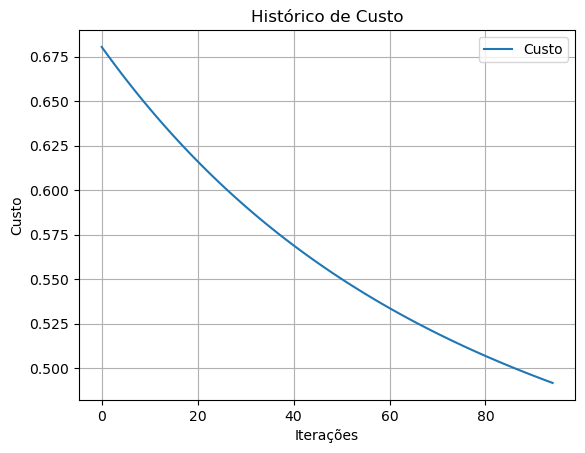

In [11]:
# para plots
X_test, _, y_test, _ = split_data(X, pd.Series(y), test_size=0.2)
predictions = [1 if sigmoid(sum(theta[j] * X_test.iloc[i, j] for j in range(len(theta)))) >= 0.5 else 0 for i in range(len(X_test))]

plt.plot(range(len(cost_history)), cost_history, label="Custo")
plt.title("Histórico de Custo")
plt.xlabel("Iterações")
plt.ylabel("Custo")
plt.legend()
plt.grid(True)
plt.show()

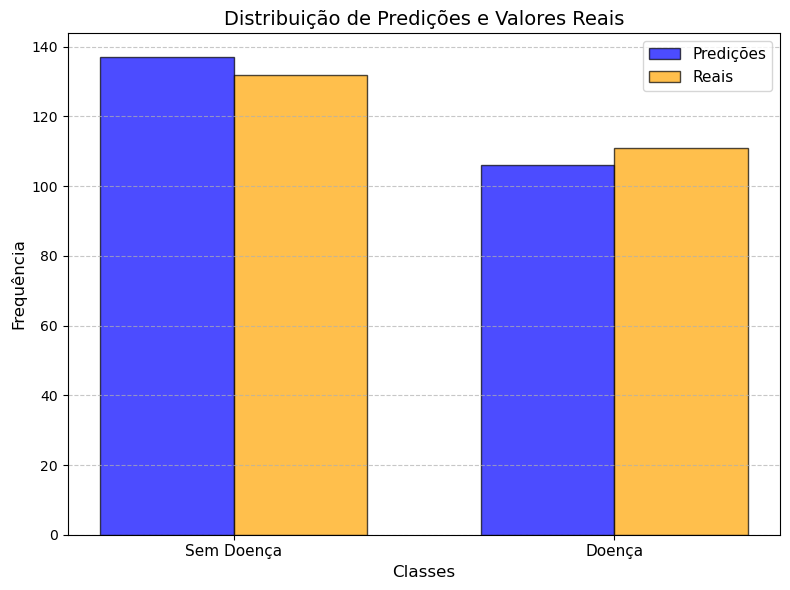

In [12]:
def dist_y_pred():
    # labels y
    class_labels = {0: "Sem Doença", 1: "Doença"}
    
    # frequências classes
    unique_classes = [0, 1]
    pred_counts = [predictions.count(c) for c in unique_classes]
    real_counts = [list(y_test).count(c) for c in unique_classes]
    
    # posição barras
    x = list(range(len(unique_classes)))  # Posições para as classes (0, 1)
    width = 0.35  # largura barras
    
    # barras lado a lado
    plt.figure(figsize=(8, 6))
    plt.bar([pos - width/2 for pos in x], pred_counts, width, label="Predições", color="blue", alpha=0.7, edgecolor="k")
    plt.bar([pos + width/2 for pos in x], real_counts, width, label="Reais", color="orange", alpha=0.7, edgecolor="k")
    
    plt.title("Distribuição de Predições e Valores Reais", fontsize=14)
    plt.xlabel("Classes", fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    plt.xticks(x, labels=[class_labels[c] for c in unique_classes], fontsize=11)
    plt.legend(fontsize=11)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    plt.tight_layout()
    plt.show()
dist_y_pred()

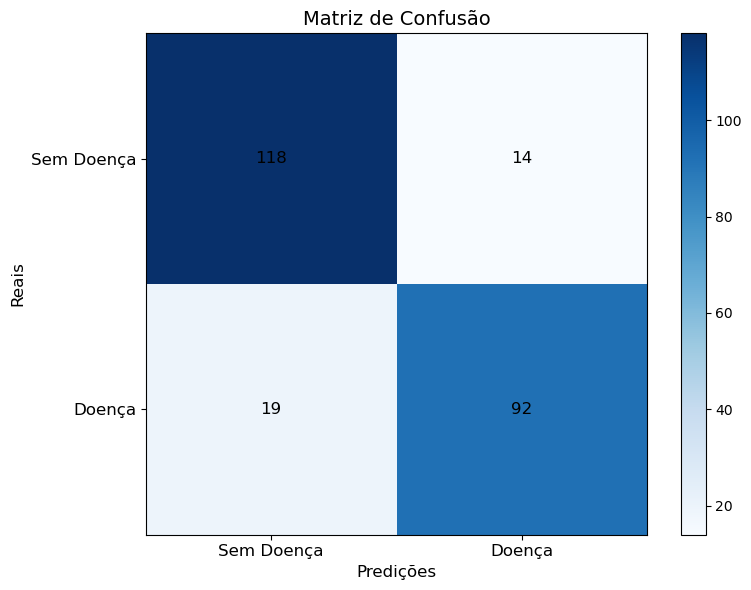

In [13]:
def confusion_matrix_manual(y_true, y_pred):
    """
    Calcula a matriz de confusão.
    
    Parâmetros:
    y_true : list ou Series
        Valores reais.
    y_pred : list ou Series
        Valores preditos.
    
    Retorna:
    list
        Matriz de confusão no formato [[TN, FP], [FN, TP]].
    """
    # contadores
    TP = FP = FN = TN = 0
    
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            TP += 1
        elif true == 0 and pred == 1:
            FP += 1
        elif true == 1 and pred == 0:
            FN += 1
        elif true == 0 and pred == 0:
            TN += 1
    
    return [[TN, FP], [FN, TP]]
def matriz_conf():
    class_labels = {0: "Sem Doença", 1: "Doença"}
    # matriz de confusão
    cm = confusion_matrix_manual(y_test, predictions)
    
    # heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap="Blues")
    plt.title("Matriz de Confusão", fontsize=14)
    plt.colorbar()
    
    # adicionando os números à matriz
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i][j], ha="center", va="center", color="black", fontsize=12)
    
    plt.xticks([0, 1], labels=[class_labels[0], class_labels[1]], fontsize=12)
    plt.yticks([0, 1], labels=[class_labels[0], class_labels[1]], fontsize=12)
    plt.xlabel("Predições", fontsize=12)
    plt.ylabel("Reais", fontsize=12)
    plt.grid(False)
    
    plt.tight_layout()
    plt.show()
matriz_conf()